In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(np.__version__)

1.23.4


In [15]:
df=pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head()
#df.info

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [11]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

<AxesSubplot: >

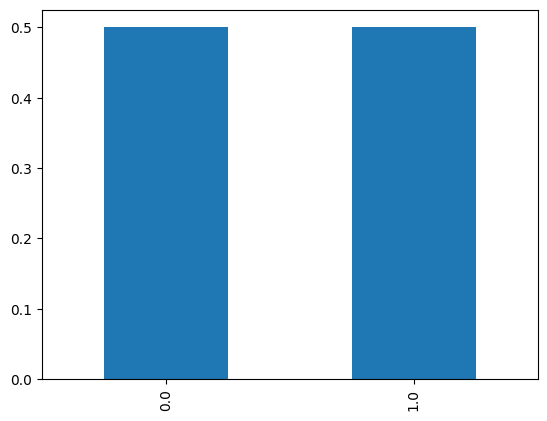

In [6]:
df['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar')

In [28]:
#Select columns(factors) related to diabetes
df1 = df[['Diabetes_binary', 'Age', 'BMI', 'HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits']]
df1

,Diabetes_binary,Age,BMI,HighBP,HighChol,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits
0,0.0,4.0,26.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,12.0,26.0,1.0,1.0,1.0,0.0,0.0,1.0
2,0.0,13.0,26.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,11.0,28.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.0,8.0,29.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
70687,1.0,6.0,37.0,0.0,1.0,0.0,0.0,0.0,0.0
70688,1.0,10.0,29.0,0.0,1.0,0.0,1.0,0.0,1.0
70689,1.0,13.0,25.0,1.0,1.0,0.0,1.0,0.0,1.0
70690,1.0,11.0,18.0,1.0,1.0,0.0,0.0,0.0,0.0
